In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
train = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/MLDataset/train-ml.csv")
test = pd.read_csv("/content/drive/MyDrive/MACHINE LEARNING/MLDataset/test-ml.csv")

X_train = (pd.DataFrame(train.loc[ : , 'pixel0':'pixel783'])).to_numpy()
Y_train = (pd.DataFrame(train.loc[ : , ['label']])).to_numpy()

X_test = (pd.DataFrame(test.loc[ : , 'pixel0':'pixel783'])).to_numpy()
Y_test = (pd.DataFrame(test.loc[ : , ['label']])).to_numpy()

In [14]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix: \n",confusion_matrix(Y_test,Y_pred), "\n")
print(classification_report(Y_test,Y_pred))
print("\nAccuracy: ",accuracy_score(Y_test, Y_pred))

Confusion Matrix: 
 [[260  39]
 [ 52 229]] 

              precision    recall  f1-score   support

        face       0.83      0.87      0.85       299
      masked       0.85      0.81      0.83       281

    accuracy                           0.84       580
   macro avg       0.84      0.84      0.84       580
weighted avg       0.84      0.84      0.84       580


Accuracy:  0.843103448275862


In [16]:
import pickle
filename = 'Dtree Model.pickle'
pickle.dump(clf, open(filename, 'wb'))

In [17]:
#filename = '/content/drive/MyDrive/MACHINE LEARNING/ML MODELS/DT Model.pickle'
#loaded_model = joblib.load(open(filename, 'rb'))

filename = '/content/drive/MyDrive/MACHINE LEARNING/ML MODELS/Dtree Model.pickle'
loaded_model = pickle.load(open(filename, 'rb'))

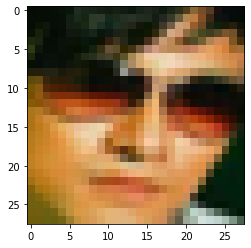

In [18]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/MACHINE LEARNING/MLDataset/test/Without Mask/0_0_wangfeng_0045.jpg'
img = np.array(Image.open(path).resize((28, 28)))
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
test_img = imgGray.flatten()
test_img = np.expand_dims(test_img, axis=0)

In [19]:
y_pred = loaded_model.predict(test_img)

In [20]:
y_pred

array(['face'], dtype=object)

In [21]:
Y_pred = loaded_model.predict(X_test)

In [22]:
Y_pred

array(['masked', 'masked', 'masked', 'face', 'face', 'face', 'face',
       'face', 'face', 'face', 'face', 'masked', 'face', 'masked', 'face',
       'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face',
       'face', 'face', 'face', 'face', 'masked', 'face', 'face', 'face',
       'face', 'face', 'face', 'face', 'face', 'masked', 'face', 'face',
       'face', 'face', 'face', 'face', 'face', 'masked', 'masked', 'face',
       'face', 'face', 'face', 'face', 'face', 'masked', 'masked', 'face',
       'face', 'face', 'face', 'face', 'masked', 'masked', 'face', 'face',
       'face', 'masked', 'face', 'face', 'face', 'face', 'face', 'masked',
       'face', 'masked', 'face', 'face', 'face', 'face', 'face', 'face',
       'face', 'face', 'face', 'face', 'face', 'face', 'face', 'masked',
       'face', 'masked', 'face', 'face', 'masked', 'face', 'face', 'face',
       'face', 'face', 'face', 'face', 'face', 'face', 'face', 'face',
       'face', 'face', 'face', 'face', 'face', 

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Confusion Matrix: \n",confusion_matrix(Y_test,Y_pred), "\n")
print(classification_report(Y_test,Y_pred))
print("\nAccuracy: ",accuracy_score(Y_test, Y_pred))

Confusion Matrix: 
 [[259  40]
 [ 53 228]] 

              precision    recall  f1-score   support

        face       0.83      0.87      0.85       299
      masked       0.85      0.81      0.83       281

    accuracy                           0.84       580
   macro avg       0.84      0.84      0.84       580
weighted avg       0.84      0.84      0.84       580


Accuracy:  0.8396551724137931


In [24]:
text_representation = tree.export_text(loaded_model)
print(text_representation)

|--- feature_714 <= 77.50
|   |--- feature_308 <= 24.00
|   |   |--- feature_552 <= 53.00
|   |   |   |--- feature_212 <= 42.50
|   |   |   |   |--- class: face
|   |   |   |--- feature_212 >  42.50
|   |   |   |   |--- class: masked
|   |   |--- feature_552 >  53.00
|   |   |   |--- feature_684 <= 149.50
|   |   |   |   |--- class: face
|   |   |   |--- feature_684 >  149.50
|   |   |   |   |--- class: masked
|   |--- feature_308 >  24.00
|   |   |--- feature_710 <= 95.50
|   |   |   |--- feature_286 <= 51.00
|   |   |   |   |--- feature_593 <= 74.00
|   |   |   |   |   |--- feature_549 <= 78.00
|   |   |   |   |   |   |--- class: masked
|   |   |   |   |   |--- feature_549 >  78.00
|   |   |   |   |   |   |--- feature_345 <= 132.50
|   |   |   |   |   |   |   |--- class: face
|   |   |   |   |   |   |--- feature_345 >  132.50
|   |   |   |   |   |   |   |--- class: masked
|   |   |   |   |--- feature_593 >  74.00
|   |   |   |   |   |--- feature_591 <= 43.50
|   |   |   |   |   |   |

In [25]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [26]:
pip install graphviz

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


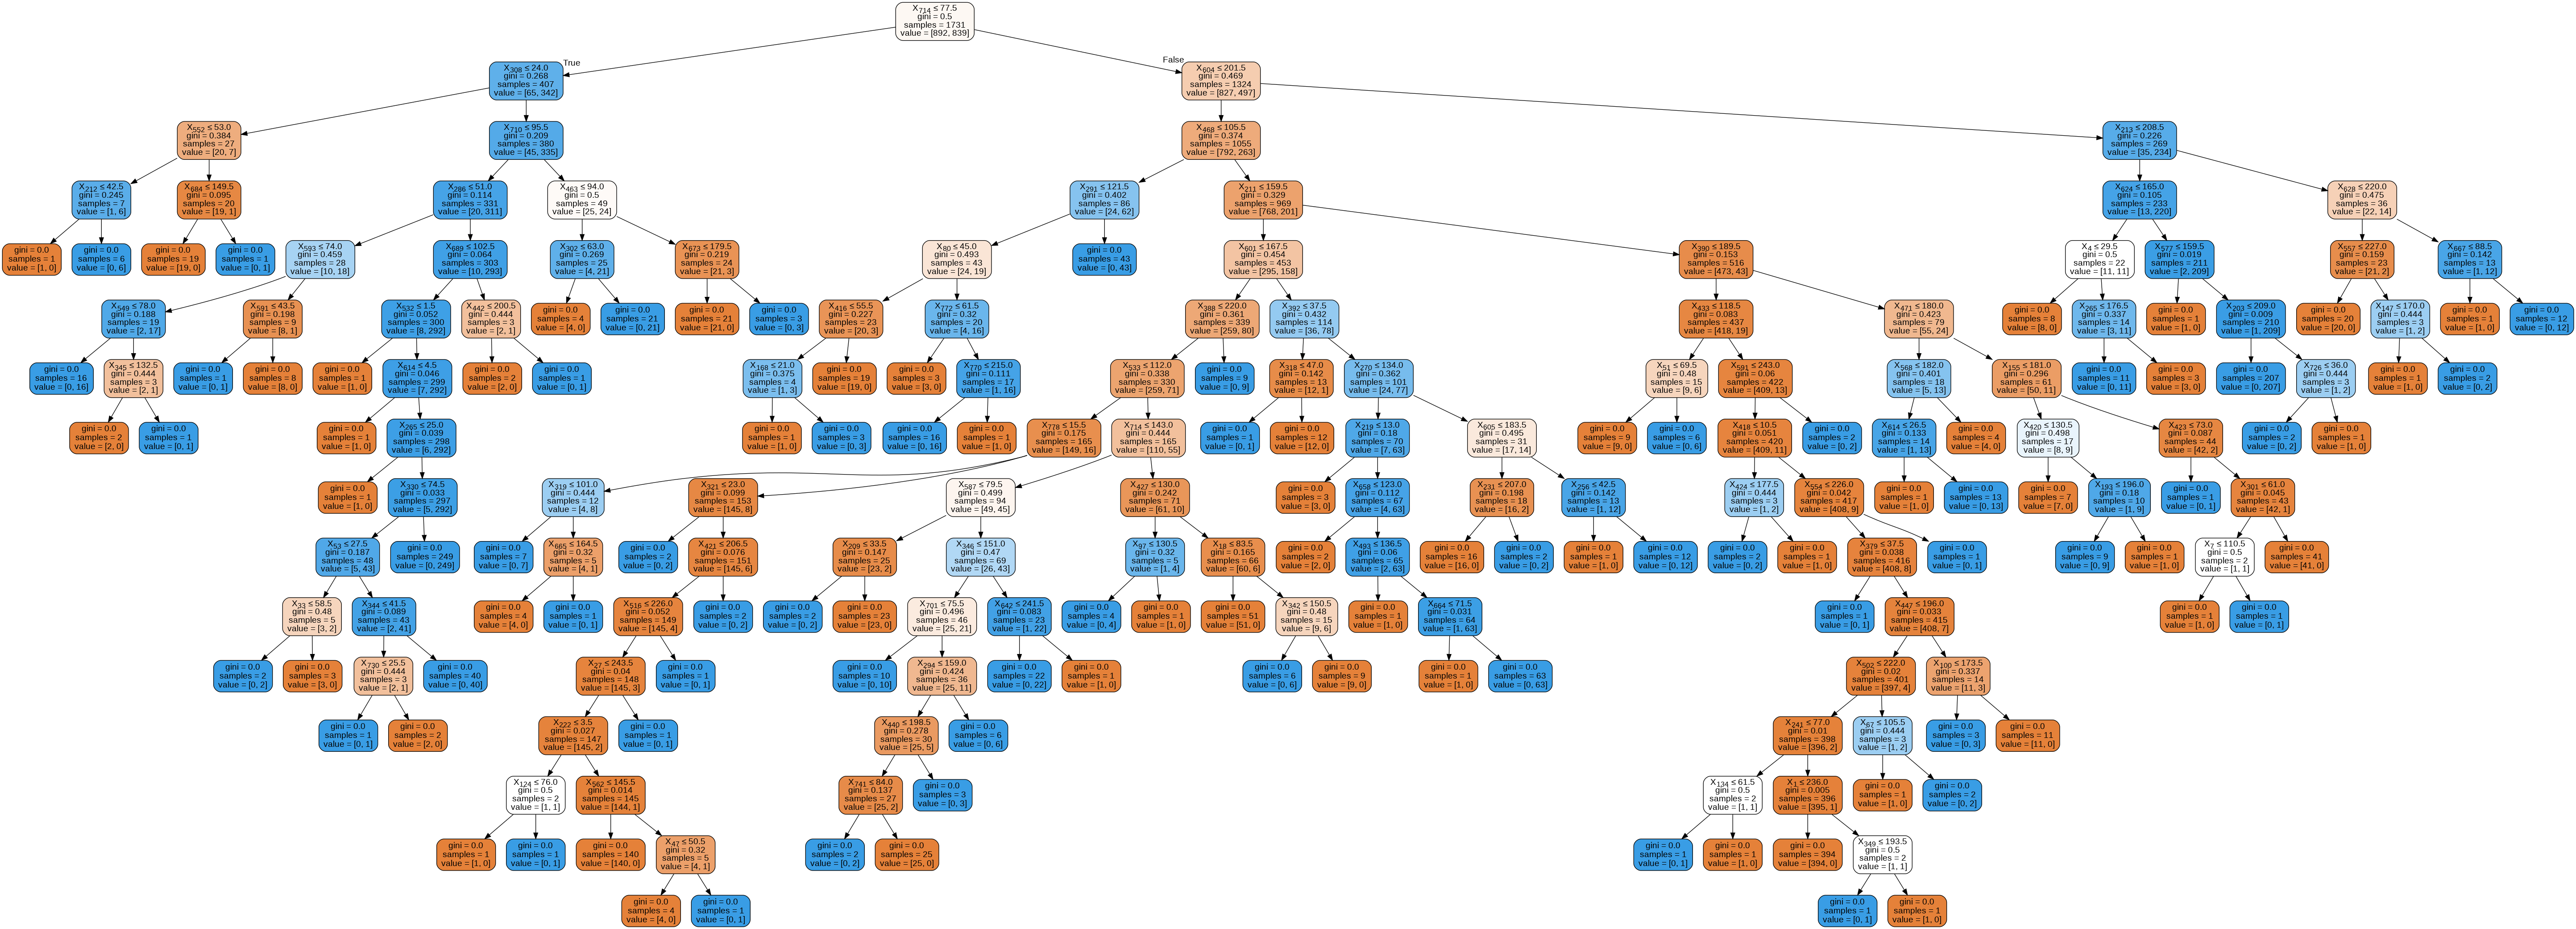

In [27]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(loaded_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

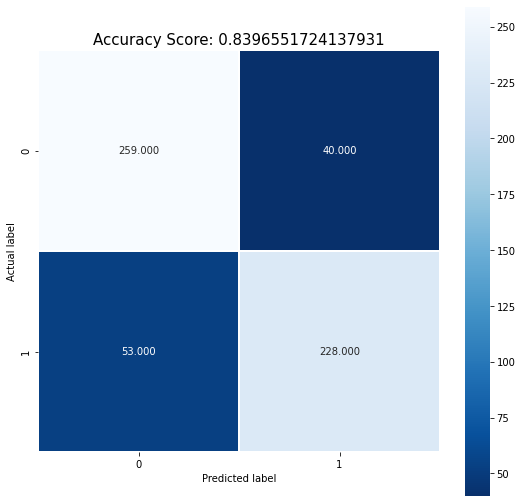

In [28]:
import seaborn as sns

cm = confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(Y_test, Y_pred))
plt.title(all_sample_title, size = 15);

Text(0.5, 1.0, 'Performance of Decision Tree Model')

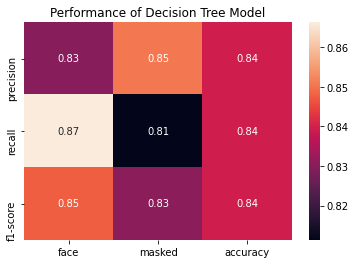

In [30]:
clf_report = classification_report(Y_test, Y_pred , output_dict=True)
plotmap = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :3], annot=True, linecolor='black')
plt.title("Performance of Decision Tree Model")

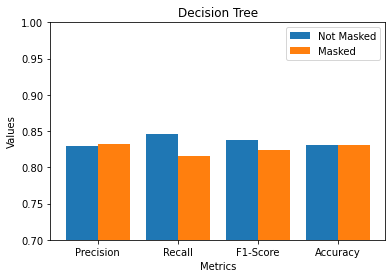

In [ ]:
report_data = classification_report(Y_test,Y_pred, output_dict=True)
x = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
acc=0
accuracy = 0
y = []
z = []
for key , value in report_data.items():
  acc+=1
  if(acc == 3):
    accuracy = value
    break

  for k , v in value.items():
    if(acc == 1): 
      y.append(v)
    if(acc == 2): 
      z.append(v)
y.pop()
y.append(accuracy)
z.pop()
z.append(accuracy)

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y, 0.4, label = 'Not Masked')
plt.bar(x_axis + 0.2, z, 0.4, label = 'Masked')

plt.xticks(x_axis, x)
plt.ylim([0.70,1.0])
plt.xlabel("Metrics")
plt.ylabel("Values")
plt.title("Decision Tree")
plt.legend()
plt.show()